# Reduced order model for a lithium ion cell with uniform reaction rate approximation

In [19]:
import CaseStudy.SenthilModel as sm
using Gadfly

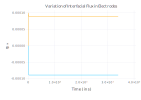

In [20]:
I = 13.5
t = Float64.(0:1:3400)
tspan = 1

q₂ᵢₖ = sm.InterfacialFlux(t, tspan, I)

plot(
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₚ, Geom.line),
    Guide.title("Variation of Interfacial Flux in Electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("q₂ᵢₖ"),
)

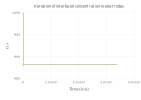

In [21]:
c₂ᵢₖ = sm.InterfacialConc(q₂ᵢₖ)

plot(
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₚ, Geom.line),
    Guide.title("Variation of interfacial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₂ᵢₖ")
)

x

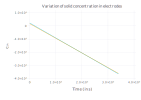

In [22]:
c₁ₖ = sm.SolidConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖ.c₁ₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖ.c₁ₚ, Geom.line),
    Guide.title("Variation of solid concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖ")
)

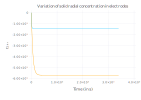

In [23]:
c₁ₖᵣ = sm.SolidRadialConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖᵣ.c₁ₙᵣ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖᵣ.c₁ₚᵣ, Geom.line),
    Guide.title("Variation of solid radial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖᵣ"),
)

In [24]:
sm.cₛₚ(c₁ₖ, c₁ₖᵣ, I)

# V = sm.V(I, c₁ₖ, c₁ₖᵣ, c₂ᵢₖ, q₂ᵢₖ)

3401-element Vector{Float64}:
   21729.655959845324
   21432.68947673733
   21156.464234443625
   20898.634826727324
   20657.121064387753
   20430.077984687716
   20215.869252095577
   20013.043566854358
   19820.313741254766
   19636.538141949874
       ⋮
 -365035.3416470209
 -365148.88614388584
 -365262.4306407508
 -365375.97513761575
 -365489.5196344807
 -365603.06413134566
 -365716.6086282106
 -365830.15312507557
 -365943.6976219405